## Ejercicio 1: Visualizando contadores de bicicletas de Seattle

Vamos a hacer un ejercicio con datos de series temporales del mundo real, en concreto, echemos un vistazo a los recuentos de bicicletas en un puente de Seattle: [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).

Estos datos provienen de un contador de bicicletas automatizado, instalado a fines de 2012, que tiene sensores inductivos en las aceras este y oeste del puente.
Los recuentos de bicicletas por hora se pueden descargar de http://data.seattle.gov/; o directamente a través de [este link](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

Para ahorrarnos tiempo, ya tienes el fichero descargado en esta carpeta bajo el nombre de "Fremont_Bridge_Bicycle_Counter.csv".

Si leemos el dataset sin especificar nada más, Pandas interpretará la columna temporal como un string. Sin embargo, si hacemos la conversión a Datetime tras la lectura, podremos utilizarlo como dato temporal.

Así que lee el csv y convierte la columna "Date" en algo temporal. Después comprueba que lo has convertido bien analizando los tipos de las columnas del dataset:

In [56]:
import pandas as pd

df = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                            datetime64[ns]
Fremont Bridge Total                   float64
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
dtype: object

In [54]:
# # También podríamos hacerlo todo al leerlo, ya que hay un parámetro parse_Date que nos intenta convertir todas las fechas, y podemos establecer el índice al leerlo:
# df = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv", parse_dates=True, index_col="Date")

In [57]:
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03 00:00:00,13.0,4.0,9.0
1,2012-10-03 01:00:00,10.0,4.0,6.0
2,2012-10-03 02:00:00,2.0,1.0,1.0
3,2012-10-03 03:00:00,5.0,2.0,3.0
4,2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...,...
137793,2020-11-30 19:00:00,35.0,17.0,18.0
137794,2020-11-30 20:00:00,22.0,12.0,10.0
137795,2020-11-30 21:00:00,11.0,6.0,5.0
137796,2020-11-30 22:00:00,11.0,5.0,6.0


Ahora, y para ahorrarnos un poco de código en el futuro, vamos a renombrar las columnas como "date", "total", "este" y "oeste", respectivamente:

In [58]:
df = df.rename({"Date": "date", "Fremont Bridge Total": "total", "Fremont Bridge East Sidewalk": "este", "Fremont Bridge West Sidewalk": "oeste"}, axis=1)
df.columns

Index(['date', 'total', 'este', 'oeste'], dtype='object')

Una vez lo tenemos, vamos a echar un vistazo a los estadísticos básicos de cada una de las columnas:

In [60]:
df.describe()

,total,este,oeste
count,137777.000000,137777.000000,137777.000000
mean,112.490771,51.267004,61.223767
std,143.132406,65.992109,89.076846
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualizando los datos

Comencemos visualizando los datos que tenemos. Pra ello, representa en la misma gráfica los 3 valores a lo largo del eje temporal:

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Comenzamos estableciendo el índice, donde pondremos el eje temporal:
df = df.set_index('date')

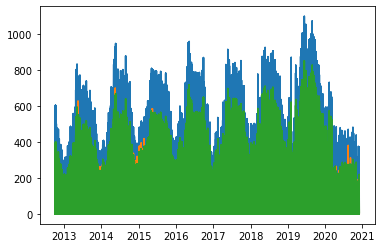

In [75]:
plt.plot(df['total'])
plt.plot(df['este'])
plt.plot(df['oeste'])
# df.plot()

In [46]:
df

,total,este,oeste
date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-11-30 19:00:00,35.0,17.0,18.0
2020-11-30 20:00:00,22.0,12.0,10.0
2020-11-30 21:00:00,11.0,6.0,5.0


Parece que si lo intentamos representar todo junto, la densidad de los datos hace que no veamos nada. Y es que tener datos con tanta variación cada hora, es algo que no parece tener demasiado sentido para representar en un espacio temporal de tanta granularidad como el que tenemos.
Por ello, parece que en este caso lo más lógico será remuestrear nuestros datos a un espectro de más alto nivel, es decir, a unidades de tiempo superiores, por ejemplo, agrupando por mes.

En este caso, a diferencia de los ejemplos vistos en clase, lo que nos interesará será la suma, y no la media, ya que estamos muestreando para saber cuántas bicicletas entre medición y medición (es decir, cuántas bicicletas pasan al mes):

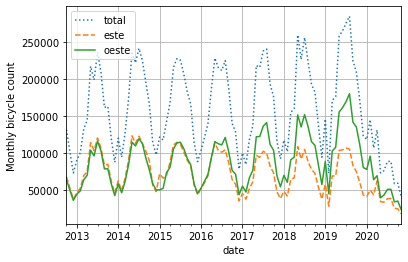

In [76]:
monthly = df.resample('M').sum()
monthly.plot(style=[':', '--', '-'])
plt.ylabel('Monthly bicycle count')
plt.grid()

Con este gráfico, podemos observar la estacionalidad de los datos, ya que parece que en verano la gente pasea en bicicleta mucho más que en verano.

Otra forma que resulta útil para agregar los datos es usar una media móvil, utilizando la función ``pd.rolling_mean()``.
Utilízala para realizar una media móvil de 30 días de estos datos, asegurándote de centrar la ventana:

Text(0, 0.5, 'mean hourly count')

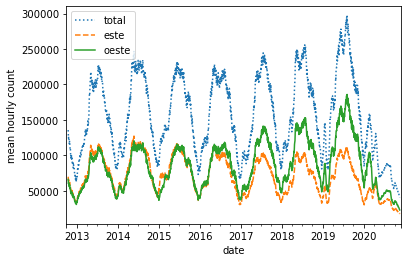

In [79]:
daily = df.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

Como habrás podido comprobar, ahora tenemos un registro por día (que nos acumula los datos de los últimos 30 días) mientras que antes teníamos un dato por cada mes. 

Esto da lugar a cierta irregularidad en la gráfica, cosa que podemos "arreglar" variando el corte de la ventana para que no sea tan abrupto.
Podemos obtener una versión más suave de una media móvil usando una función de ventana, por ejemplo, una ventana gaussiana.

Revisa en la [documentación]() cómo usar el tipo de ventana con la función ``pd.rolling()`` y utiliza una ventana gaussiana con un ancho de ventana de 50 días, con 10 días de ancho de Gauss. Probablemente no sepas cómo introducir el tamaño de 10 días de la ventana de Gauss, pero verás que si haces el sumatorio de los valroes tras haber establecido que quieres usar una ventana de Gauss, el propio Python se te quejará pidiéndote un parámetro en cierta función. Ese parámetro será el que indique este ancho:

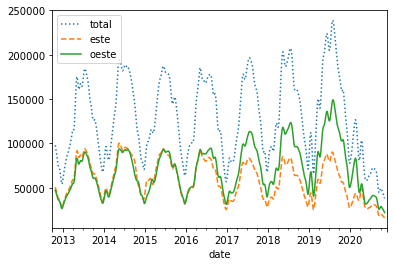

In [94]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

### Investigando los datos

Si bien estas vistas de datos suavizadas son útiles para tener una idea de la tendencia general de los datos, ocultan gran parte de la estructura interesante.
Por ejemplo, podríamos querer mirar el tráfico promedio en función de la hora del día.
Podemos hacer esto usando la funcionalidad GroupBy. ¿Cómo lo harías? Visualízalo también en un gráfico de línea.

In [96]:
df.groupby(df.index.time).mean() # agrupamos por horas y calculamos la agregación (media) calculada entre todos los días

,total,este,oeste
00:00:00,11.203413,4.743295,6.460118
01:00:00,5.932428,2.656914,3.275514
02:00:00,3.902252,1.872927,2.029324
03:00:00,2.880878,1.481540,1.399338
04:00:00,6.448102,3.413967,3.034134
05:00:00,25.437304,15.480843,9.956461
06:00:00,89.141414,53.450540,35.690874
07:00:00,224.785441,139.167189,85.618251
08:00:00,318.730930,187.320098,131.410832
09:00:00,186.990244,101.132578,85.857666


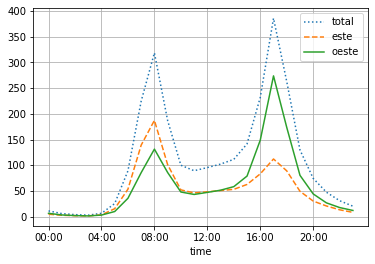

In [100]:
import numpy as np
by_time = df.groupby(df.index.time).mean()

hourly_ticks = 4 * 60 * 60 * np.arange(6) # saltos de 4 horas, 6 puntos diferentes
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);
plt.grid()

# a las 8:00 hay mucho tráfico del este al oeste y a las 17:00 vuelven del oeste al este

El tráfico horario tiene una distribución bimodal como podemos observar, con picos alrededor de las 8:00 de la mañana y las 17:00.
Esta es una prueba probable de una fuerte componente de tráfico de pasajeros que cruza el puente para ir a trabajar por la mañana y de vuelta por la tarde.
Esto se evidencia aún más por las diferencias entre la acera occidental (generalmente utilizada hacia el centro de Seattle), que alcanza su punto máximo por la mañana, y la acera este (generalmente utilizada alejándose del centro de Seattle), que alcanza su punto máximo por la noche.

También podríamos sentir curiosidad por saber cómo cambian las cosas según el día de la semana. Nuevamente, podemos hacer esto con un simple groupby:

           total       este      oeste
date                                  
0     131.058130  58.159350  72.898780
1     139.582231  62.214482  77.367749
2     138.540268  61.785272  76.754995
3     131.800650  59.158902  72.641748
4     119.276123  53.479467  65.796656
5      64.439431  32.266006  32.173425
6      62.671734  31.778766  30.892968
            total       este      oeste
Mon    131.058130  58.159350  72.898780
Tues   139.582231  62.214482  77.367749
Wed    138.540268  61.785272  76.754995
Thurs  131.800650  59.158902  72.641748
Fri    119.276123  53.479467  65.796656
Sat     64.439431  32.266006  32.173425
Sun     62.671734  31.778766  30.892968


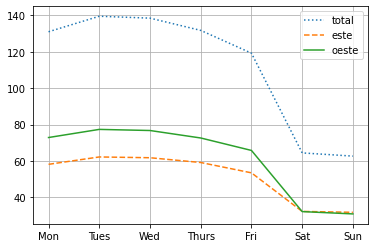

In [103]:
by_weekday = df.groupby(df.index.dayofweek).mean()

print(by_weekday)
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
print(by_weekday)
by_weekday.plot(style=[':', '--', '-'])
plt.grid()

# el sábado y el domingo no hay ciclistas al trabajo

Esto muestra una fuerte distinción entre los totales de los días laborables y los fines de semana, con aproximadamente el doble de ciclistas promedio que cruzan el puente de lunes a viernes respecto a los sábados y domingos.